##  Data downloading

In [545]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [546]:
bstn_1 = pd.read_csv('data/dataset-70319.csv')

In [547]:
bstn_1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Description of features

**The Boston Housing Dataset**
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
The Boston data frame has 506 rows and 14 columns.
This data frame contains the following columns:
* crim - per capita crime rate by town.
* zn - proportion of residential land zoned for lots over 25,000 sq.ft.
* indus - proportion of non-retail business acres per town.
* chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox - nitrogen oxides concentration (parts per 10 million).
* rm - average number of rooms per dwelling.
* age - proportion of owner-occupied units built prior to 1940.
* dis - weighted mean of distances to five Boston employment centres.
* rad - index of accessibility to radial highways.
* tax - full-value property-tax rate per 10,000 dollars.
* ptratio - pupil-teacher ratio by town.
* black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* lstat - lower status of the population (percent).
* medv - median value of owner-occupied homes in 1,000 dollars.

## Data Analysis

Let's see profile the dataset for numeric, category, nan values.

In [548]:
columns = list(bstn_1.columns)
bstn_1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [549]:
bstn_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [550]:
# statistic of the dataset
bstn_1.describe()
# There is some values that not near mean. It's okay, because it's possible according nature if the data. So these values isn't errors.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [551]:
# Data type of the dataset
bstn_1.info()
# All values correspond to the features. We can check it also via visualization.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [552]:
# Check missed values
bstn_1.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [553]:
# Function for identifying type of value and make dataframe for heatmap
def data_type(value):
    """Return value based on datatype"""
    data_type = {
        "<class 'str'>":            0,
        "<class 'numpy.str64'>":    0,
        "<class 'int'>":            1,
        "<class 'numpy.int64'>":    1,
        "<class 'float'>":          2,
        "<class 'numpy.float64'>":  2,
        "<class 'complex'>":        3,
        "<class 'numpy.complex'>":  3,
        "<class 'list'>":           4,
        "<class 'numpy.list'>":     4,
        "<class 'tuple'>":          5,
        "<class 'numpy.tuple'>":    5,
        "<class 'range'>":          6,
        "<class 'numpy.range'>":    6,
        "<class 'dict'>":           7,
        "<class 'numpy.dict'>":     7,
        "<class 'set'>":            8,
        "<class 'numpy.set'>":      8,
        "<class 'frozenset'>":      9,
        "<class 'numpy.frozenset'>":9,
        "<class 'bool'>":           10,
        "<class 'numpy.bool'>":     10,
        "<class 'bytes'>":          11,
        "<class 'numpy.bytes'>":    11,
        "<class 'bytearray'>":      12,
        "<class 'numpy.bytearray'>":12,
        "<class 'memoryview'>":     13,
        "<class 'numpy.memoryview'>":13
    }

    return int(data_type[str(type(value))])

def visual_type(df):
    df_heat = pd.DataFrame(0, columns = list(df.columns), index=range(len(df)))
    for col in list(df):
        for i in range(len(df)):
            if df[col][i] == np.nan:
                df_heat[col][i] = 14
            else:
                df_heat[col][i] = data_type(df[col][i])
    return df_heat

<AxesSubplot: >

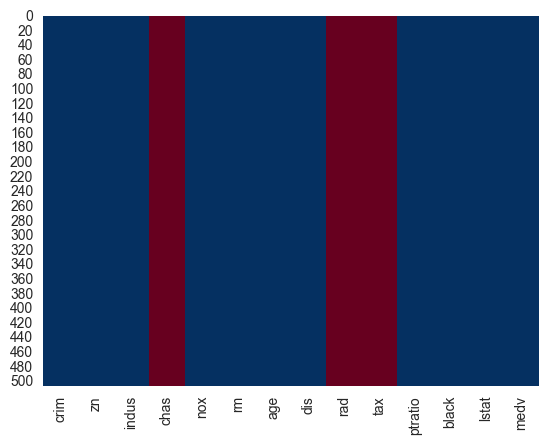

In [554]:
df_heat = visual_type(bstn_1)
sns.heatmap(df_heat, cmap='RdBu', cbar = False)
# It's method there is some problems: 1) no idea how to make legend for figure, 2) small resolution for big amount rows. Solution of these problem in processing...

**Conclusion:**
All feature values are numeric data without missed values we are able to build math model. A model allows to identify how the factors influence each other. Specify interest is to know the average value of homes (variable medv, measured in $1,000) occupied by owners, depends on a variety of factors.

C:\Users\smirn\AppData\Local\Temp\ipykernel_10636\880976905.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bstn_1.medv, kde = True, fit=st.norm)


(22.532806324110677, 9.188011545278203)

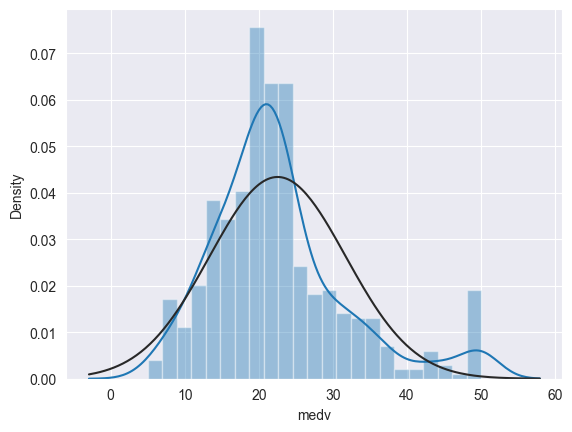

In [555]:
# Histogram for price in data frame. And compare with normal distribution
sns.distplot(bstn_1.medv, kde = True, fit=st.norm)

st.norm.fit(bstn_1.medv)

R_squared 0.92


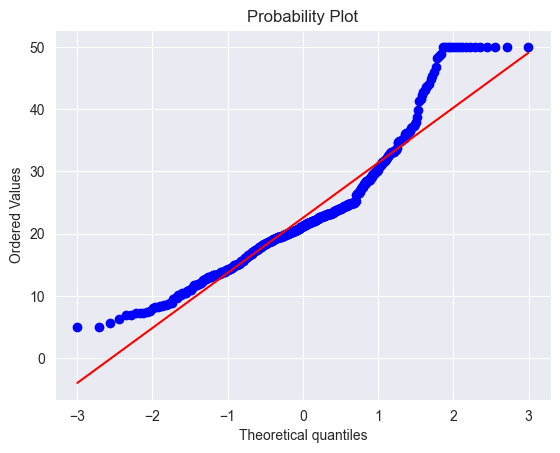

In [556]:
# Comparing the distribution of the data to the normal distribution.
fig = plt.figure()
slope, intercept, r = st.probplot(bstn_1.medv, plot=plt, dist='norm', fit=True)[1]
R_squared = r**2
print('R_squared', round(R_squared, 2))
plt.show()

According r-squared (0.92) the linear model well explain our price variable, but we see that there is strong deviation on the right side. It's look like logarithm, we're able to transform it for increasing r-squared. It's allow us to build a more accurate linear regression model.

C:\Users\smirn\AppData\Local\Temp\ipykernel_10636\1924273145.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bstn_2.medv, kde = True, fit=st.norm)


(3.085436621436588, 0.38658307558179394)

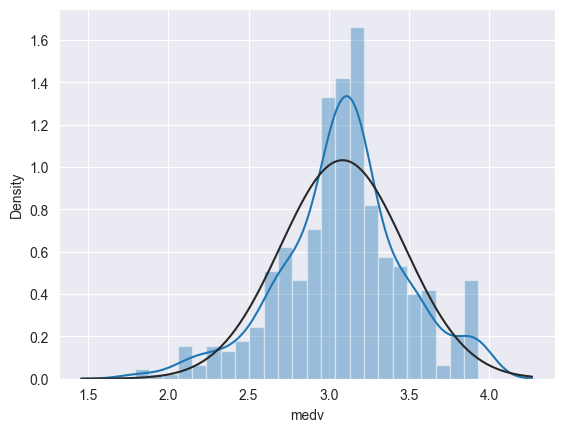

In [557]:
# using log function from numpy for transformation
bstn_2 = pd.read_csv('data/dataset-70319.csv')
bstn_2.medv = np.log1p(bstn_1.medv)

# check again
sns.distplot(bstn_2.medv, kde = True, fit=st.norm)
st.norm.fit(bstn_2.medv)

R_squared 0.98


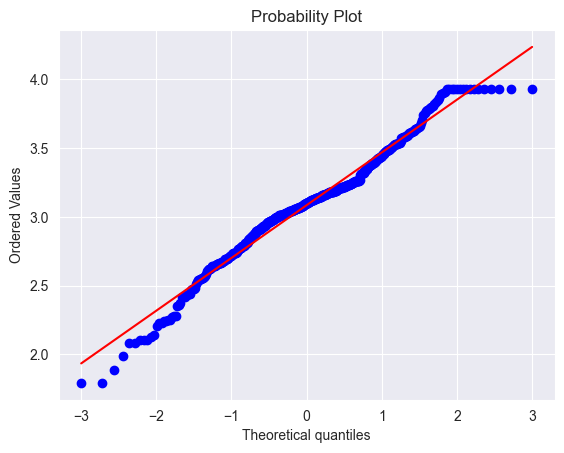

In [558]:
# Comparing the distribution of the data to the normal distribution.
fig = plt.figure()
slope, intercept, r = st.probplot(bstn_2.medv, plot=plt, dist='norm', fit=True)[1]
R_squared = r**2
print('R_squared', round(R_squared, 2))
plt.show()

Now it's better, r-squared (0.98).

### Pair-plot analysis of features (Xs)

***Observation:***
There is pairing scatter plots for all features.

We can see that homes with prices starting at 25,000 dollars:
1. are in neighborhoods with reduced crime rates (less than 20) (crim-medv);
2. are in areas where land with a high proportion of zoned lots is over 25,000 square feet (zn-medv);
3. where the house lot is adjacent to the river (chas-medv).

We can see that homes priced below 25,000 dollars:
1. have a weighted average distance of less than 5 to Boston's five employment centers (dis-medv);
2. have an accessibility index of (over 20) radial highways (rad-medv);
3. have a tax rate of about 600 dollars per 10,000 dollars (tax-medv);
4. are in cities with high student-teacher ratios (over 20). In other words, there are 20 or more students per teacher (ptratio-medv);
5. are in areas with high concentrations of nitrogen oxides (0.6 parts per 10 million) (nox-medv);
6. have a high proportion of owner-occupied apartments (over 50) built before 1940 (age-medv).

It has also been observed that.
1. as the number of rooms increases, the cost of housing increases (rm-medv);
2. houses worth more than 35,000 dollars are in cities where the percentage of blacks is about 1.26. or 400 black-medv (black-medv);
3. when the percentage of the population of inferior status decreases, housing values increase (lstat-medv).


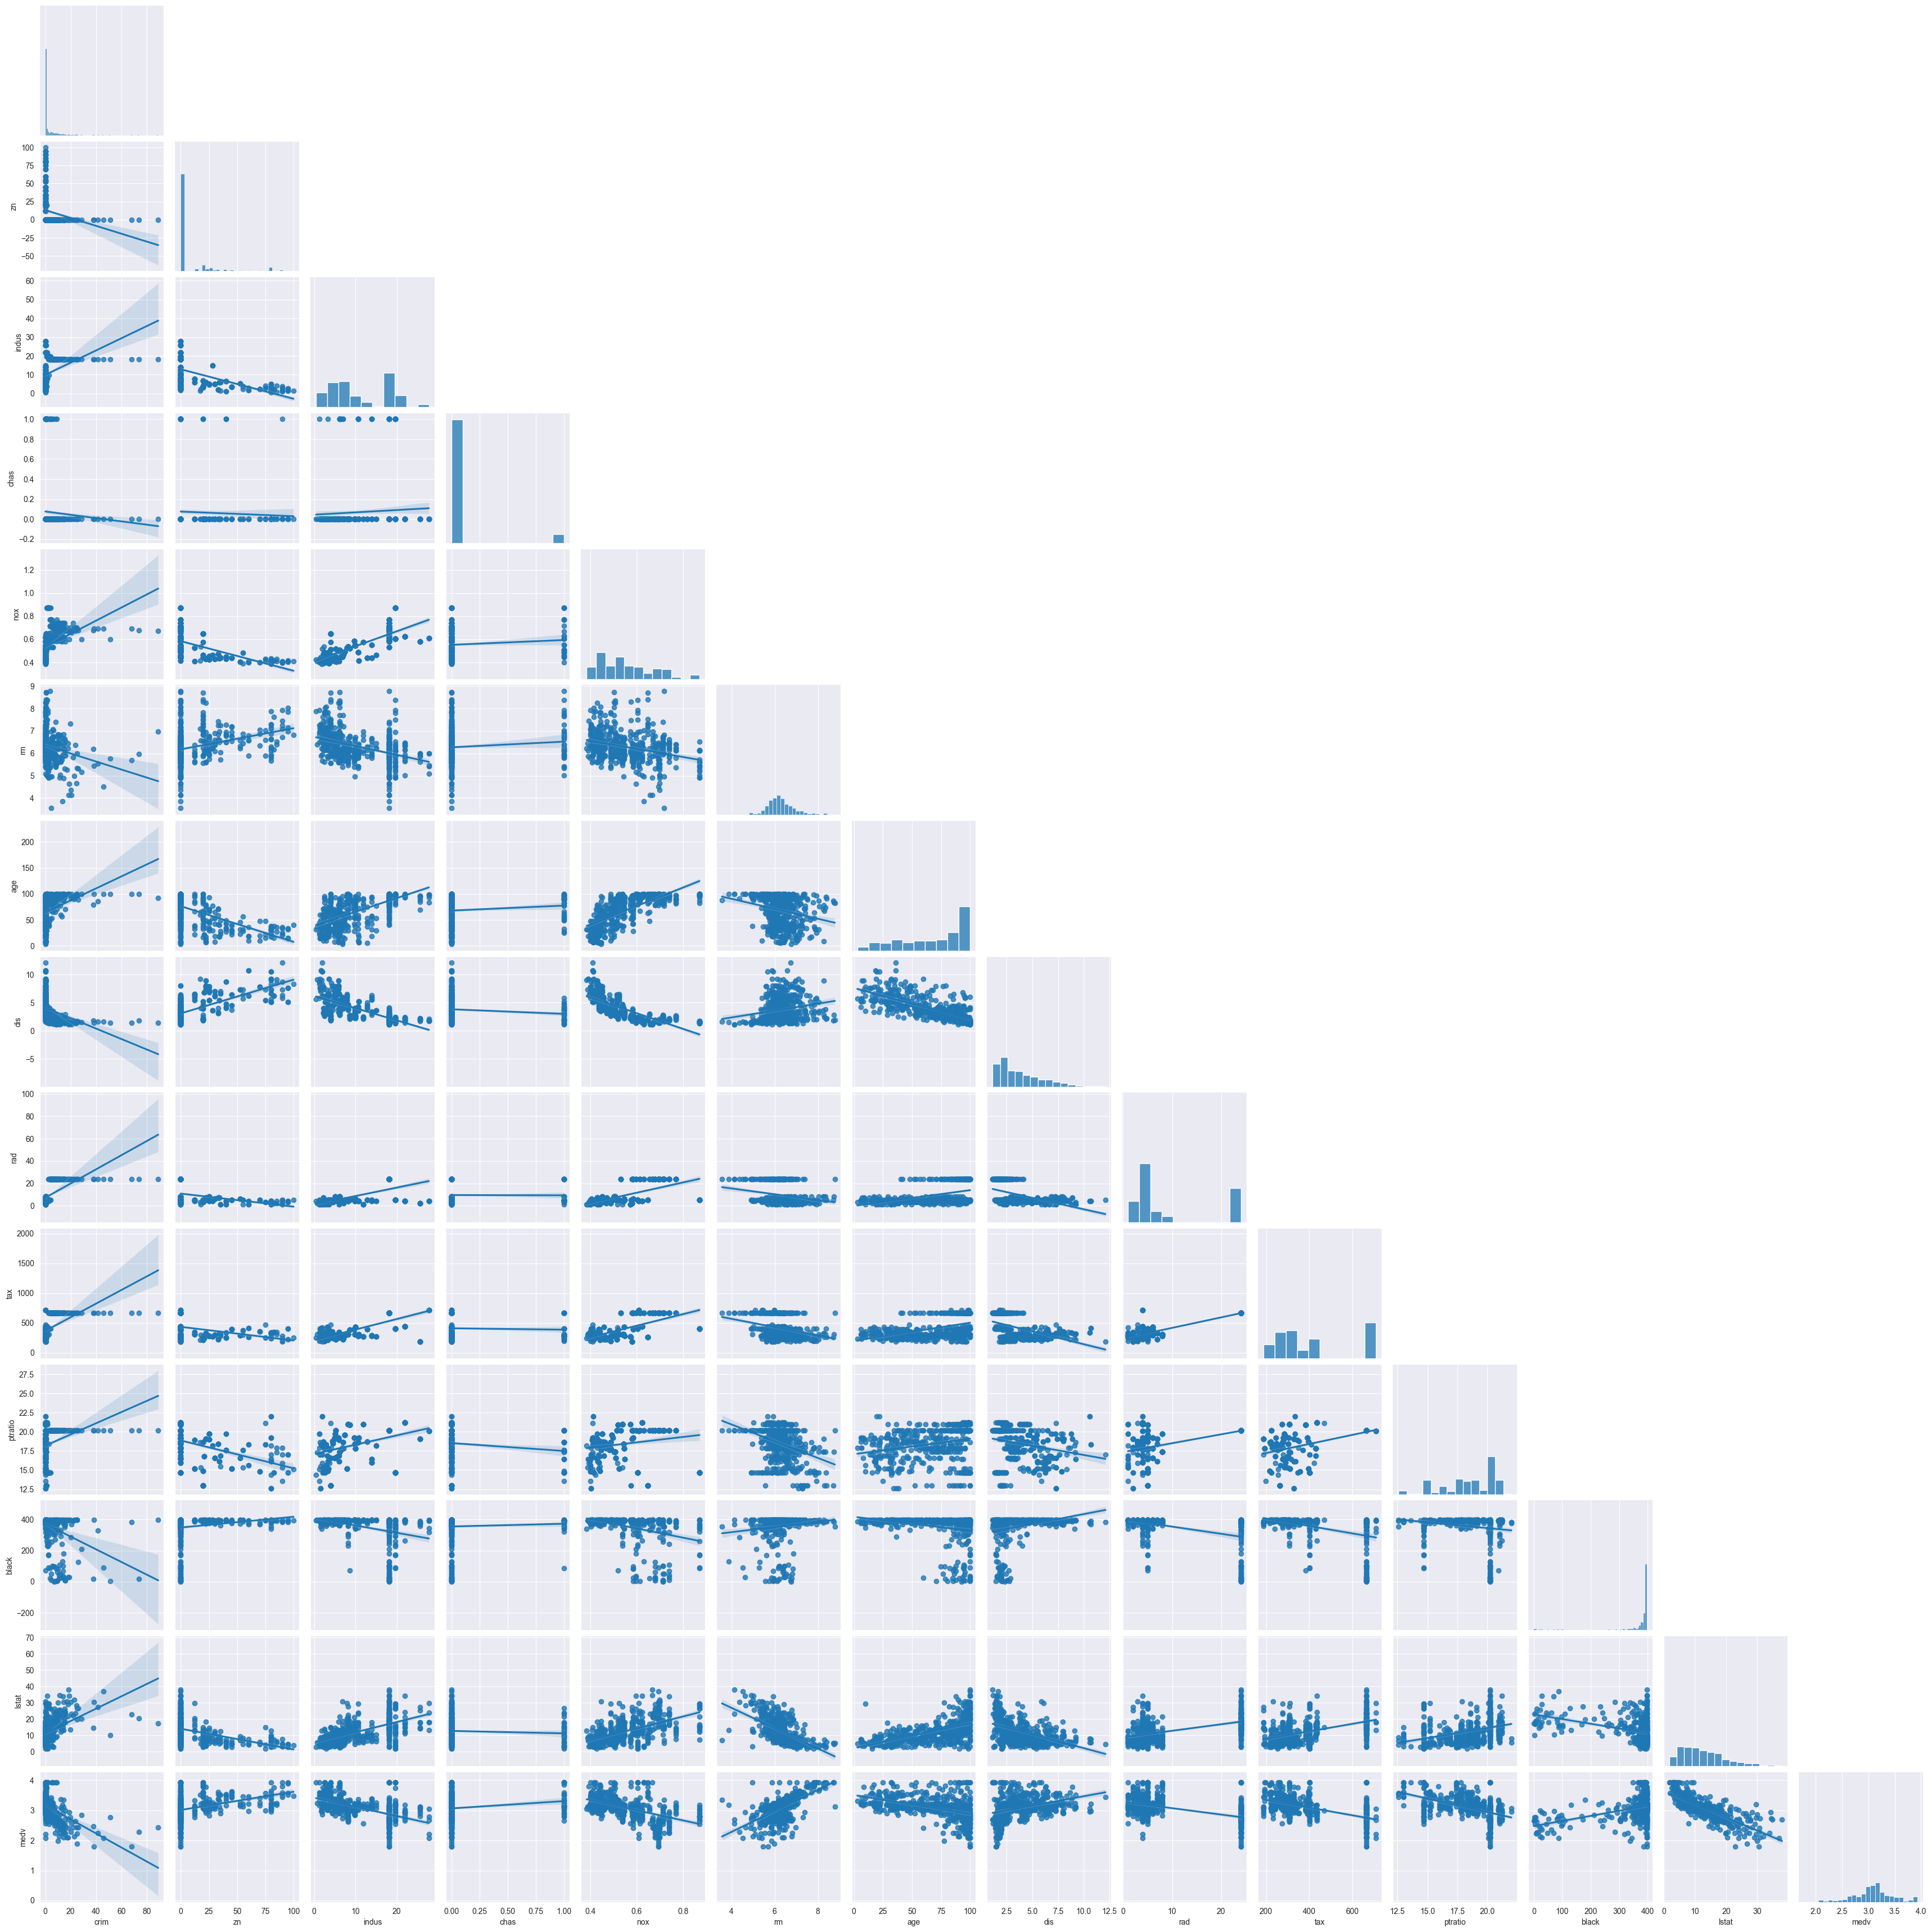

In [559]:
sns.pairplot(bstn_2, kind='reg', corner=True)

## Linear model. Conditions and checking features

### 1. Relationships between X's and Y are straight.
Here X's (features) and Y (target variable - **medv**)
According pair-plots above, we see two features with linear relation - **rm** (average number of rooms per dwelling) and **lstat** (lower status of the population, percent). They will have a high correlation with the target variable. \
Other 11 features influence on **medv** (price), but it's look a bit like binary (I mean, there is a division into two samples. In our example of houses more expensive 25,000 dollars and cheaper). Probably some of them have a significant effect on the price of the house, and some not so much. We will see this next. So we'll use all the features we have.

In [560]:
# We can check correlation between Xs and Y.
corr = bstn_2.corr().medv
corr[np.argsort(corr, axis=0)[::-1]]

medv       1.000000
rm         0.637387
black      0.400773
zn         0.365136
dis        0.339744
chas       0.159435
age       -0.452150
rad       -0.478488
ptratio   -0.504052
nox       -0.508900
crim      -0.520692
indus     -0.541258
tax       -0.558832
lstat     -0.804294
Name: medv, dtype: float64

As we expected $corr(rm, medv) = 0.6$ and $corr(lstat, medv) = -0.8$. They have a significant impact on **medv**.

### 2. Lack of correlation between features.

In [561]:
X_col = list(bstn_2.columns)[:-1]
X_col

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

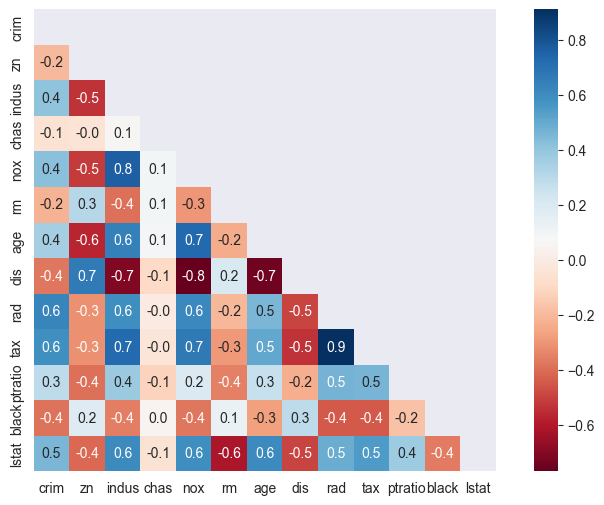

In [562]:
corr_matrix = bstn_2[X_col].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True,
            fmt='.1f', square=True, cmap='RdBu')

plt.show();

There is correlation between features. Example, as positive $corr(tax,rad)=0.9$, as negative $corr(dis, nox)=-0.8$. According **dis-nox** pair-plot, their plot looks like inverted yield curve. No idea why, probably they have common factor, which influence on them.
 Let's try to explain each of them from the other ones (using VIF). And try to build a model with/without some features.

### Standardization

In [563]:
means = bstn_1[X_col].mean(axis=0)
stds = bstn_1[X_col].std(axis=0)

scaled_X = (bstn_1[X_col] - means) / stds

scaled_X.describe()
# the std is for all features. Standardization done.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,4.037175e-17,3.089316e-16,-3.510587e-17,-2.527622e-16,-9.478584e-17,-1.685082e-16,-1.404235e-16,0.000000,5.616939e-17,-4.212704e-16,-7.021173e-16,-3.229740e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-0.981871,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-0.637331,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-0.522484,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


### Building stat.model

In [564]:
# for bstn_1 before transformation of medv
y_1 = bstn_1.get(['medv'])

# for bstn_2 after transformation
y_2 = bstn_2.get(['medv'])

In [565]:
scaled_X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [566]:
# for bstn_1 before transformation of medv
X = sm.add_constant(scaled_X)
model_1 = sm.OLS(y_1, X)
results_1 = model_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        05:13:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

In [567]:
# for bstn_2 after transformation
model_2 = sm.OLS(y_2, X)
results_2 = model_2.fit()

print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     142.5
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          2.19e-157
Time:                        05:13:51   Log-Likelihood:                 157.98
No. Observations:                 506   AIC:                            -288.0
Df Residuals:                     492   BIC:                            -228.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0854      0.008    386.479      0.0

There is two models and their R-squared:
1) before transformation of medv - 0.741
2) after transformation of medv - 0.790

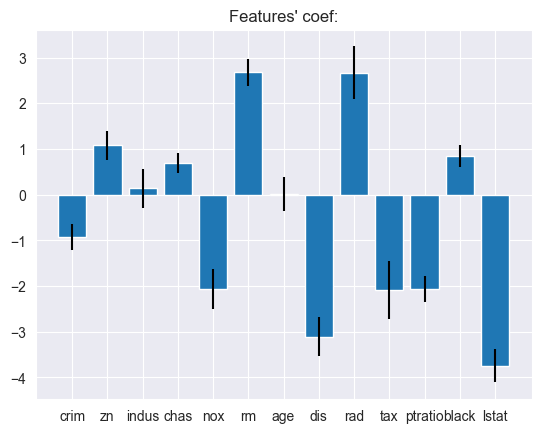

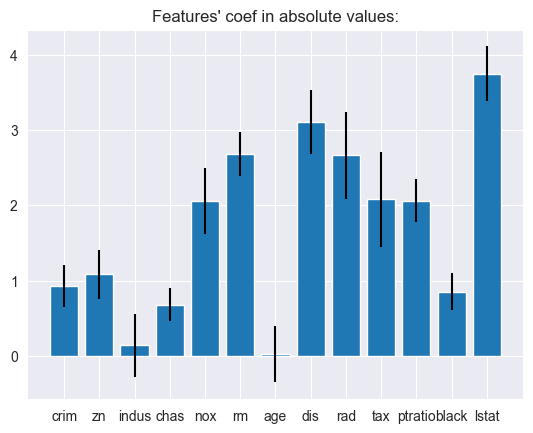

In [568]:
# Barplots of coef for model before transformation of medv
plt.bar(results_1.params.index[1:], results_1.params[1:], yerr=results_1.bse[1:])
plt.title("Features' coef:")
plt.show()
# In absolute values
plt.bar(results_1.params.index[1:], abs(results_1.params[1:]), yerr=results_1.bse[1:])
plt.title("Features' coef in absolute values:")
plt.show()

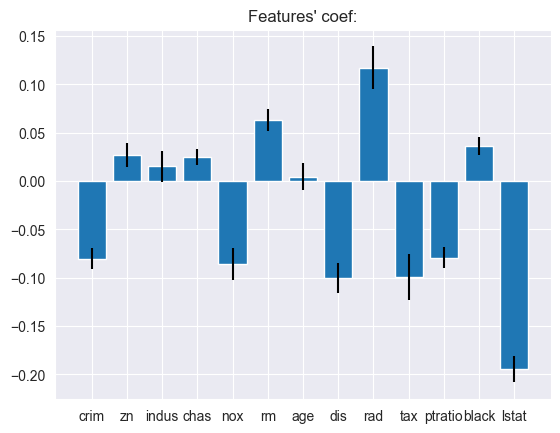

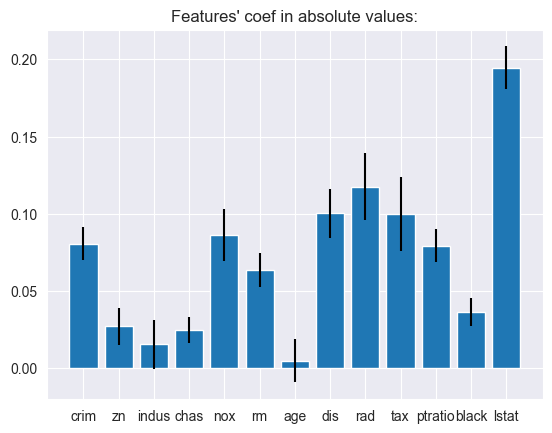

In [569]:
# Barplots of coef for model after transformation of medv
plt.bar(results_2.params.index[1:], results_2.params[1:], yerr=results_2.bse[1:]);
plt.title("Features' coef:")
plt.show()
plt.bar(results_2.params.index[1:], abs(results_2.params[1:]), yerr=results_2.bse[1:]);
plt.title("Features' coef in absolute values:")
plt.show()

The two models retained the profile of the coefficients, i.e., the ratios between them in most cases were preserved. The only thing that has changed is the value digit (has become less than 1)

The largest coefficient in abs.value is **lstat** (as we expected). Unexpectedly, **rm** has a smaller coefficient in the two models. This means that other features contribute more to the description of the model.
**indus** and **age** contribute little, almost equal to 0. Maybe we should leave them out, put them in the list of coefficients we will get rid of and see how it affects the model.

In [570]:
# list with features witch we can remove
removal_features = ['indus', 'age']

In [571]:
# get predicted result for both models
pred_result_1 = results_1.get_prediction(X)
target_pred_1 = pred_result_1.predicted_mean

pred_result_2 = results_2.get_prediction(X)
target_pred_2 = pred_result_2.predicted_mean

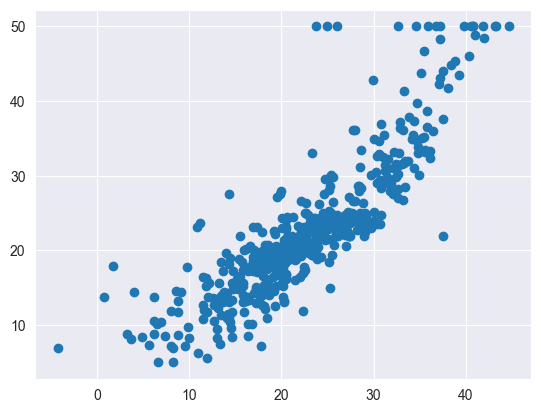

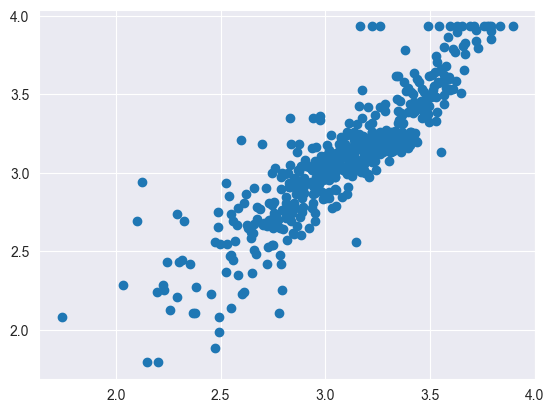

In [572]:
# resid_full = y_1 - target_pred_1
plt.scatter(target_pred_1, y_1);
plt.show()
plt.scatter(target_pred_2, y_2)
plt.show()

You can see from this graph that our model is capable of predicting from about 5,000 dollars to 40,000 dollars.
And according to the histogram for **medv**, this is most of the data, so we consider it sufficient.
Our model is not capable of correctly predicting 50,000 dollars.
It was also evident from the probplot chart earlier. We should have removed them earlier -_-

### Dataset for houses with price from 5,000 to 50,000 dollars (exclusive of 50,000 dollars)

C:\Users\smirn\AppData\Local\Temp\ipykernel_10636\887402363.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bstn_3.medv, kde = True, fit=st.norm)


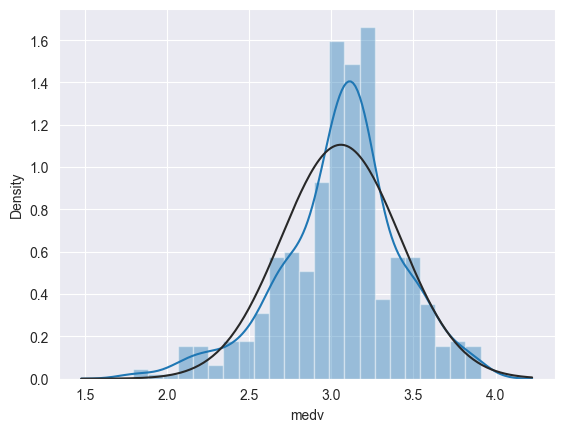

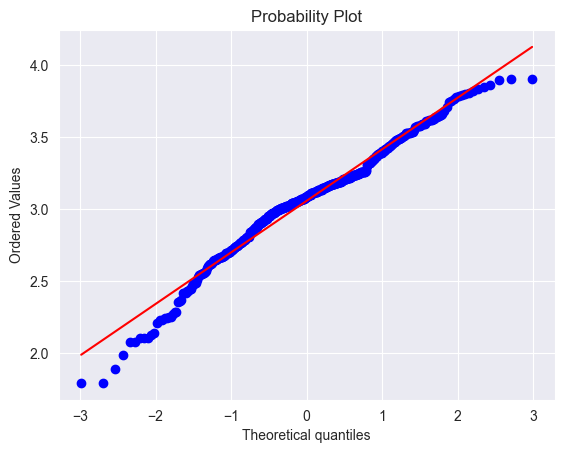

R_squared 0.98


In [586]:
# Histogram for price in data frame. And compare with normal distribution
bstn_3 = pd.read_csv('data/dataset-70319.csv')
bstn_3 = bstn_3[bstn_3.medv < 50]
bstn_3.medv = np.log1p(bstn_3.medv)

sns.distplot(bstn_3.medv, kde = True, fit=st.norm)

# Comparing the distribution of the data to the normal distribution.
fig = plt.figure()
slope, intercept, r = st.probplot(bstn_3.medv, plot=plt, dist='norm', fit=True)[1]
plt.show()

R_squared = r**2
print('R_squared', round(R_squared, 2));

In [587]:
# standartization
means = bstn_3[X_col].mean(axis=0)
stds = bstn_3[X_col].std(axis=0)

scaled_X_3 = (bstn_3[X_col] - means) / stds

X_3 = sm.add_constant(scaled_X_3)

scaled_X_3.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02
mean,-5.800349e-17,1.087565e-17,1.450087e-16,-5.075305e-17,2.610157e-16,2.936427e-16,1.160070e-16,-2.610157e-16,1.160070e-16,-5.800349e-17,7.250436e-17,-4.785288e-16,-2.900174e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.169752e-01,-4.864271e-01,-1.520698e+00,-2.505561e-01,-1.450943e+00,-4.110055e+00,-2.321302e+00,-1.278477e+00,-9.796335e-01,-1.314978e+00,-2.805051e+00,-3.838055e+00,-1.545072e+00
25%,-4.082932e-01,-4.864271e-01,-8.683302e-01,-2.505561e-01,-9.024711e-01,-5.580234e-01,-8.425051e-01,-8.168301e-01,-6.344606e-01,-7.601339e-01,-5.306854e-01,2.165187e-01,-7.872905e-01
50%,-3.893226e-01,-4.864271e-01,-2.086321e-01,-2.505561e-01,-1.397520e-01,-9.258468e-02,3.025416e-01,-2.647548e-01,-5.194030e-01,-4.641178e-01,2.748192e-01,3.877026e-01,-1.763361e-01
75%,4.793552e-04,6.074755e-02,1.024270e+00,-2.505561e-01,5.972575e-01,5.091173e-01,9.087950e-01,6.540831e-01,1.666692e+00,1.535106e+00,7.960281e-01,4.368475e-01,5.920335e-01
max,9.783473e+00,3.890970e+00,2.437490e+00,3.982978e+00,2.714017e+00,3.880486e+00,1.126265e+00,3.929946e+00,1.666692e+00,1.802860e+00,1.648915e+00,4.430817e-01,3.535980e+00


In [588]:
# for bstn_3
y_3 = bstn_3.get(['medv'])

model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()

print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     143.6
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          2.52e-155
Time:                        05:18:11   Log-Likelihood:                 194.65
No. Observations:                 490   AIC:                            -361.3
Df Residuals:                     476   BIC:                            -302.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0578      0.007    410.175      0.0

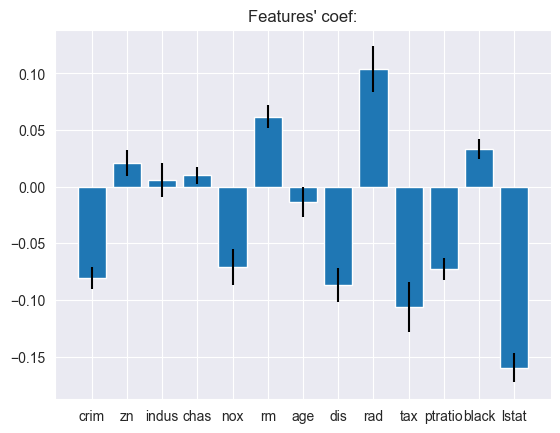

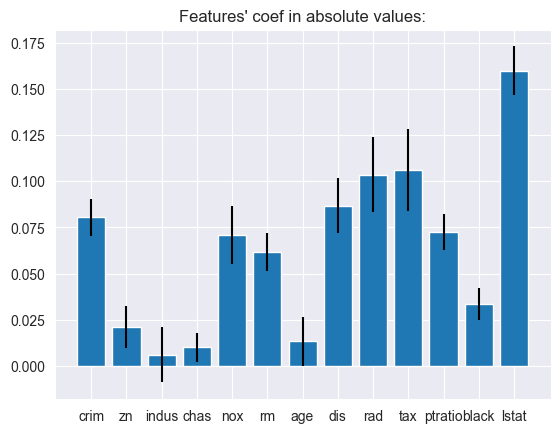

In [589]:
# Barplots of coef for model before transformation of medv
plt.bar(results_3.params.index[1:], results_3.params[1:], yerr=results_3.bse[1:])
plt.title("Features' coef:")
plt.show()
# In absolute values
plt.bar(results_3.params.index[1:], abs(results_3.params[1:]), yerr=results_3.bse[1:])
plt.title("Features' coef in absolute values:")
plt.show()

Let's try to remove features, with low coef. with big st.dev

In [590]:
removal_features

['indus', 'age']

In [591]:
model_3_1 = sm.OLS(y_3, X_3.drop(columns=['age']))
results_3_1 = model_3_1.fit()

model_3_2 = sm.OLS(y_3, X_3.drop(columns=['indus']))
results_3_2 = model_3_2.fit()

model_3_3 = sm.OLS(y_3, X_3.drop(columns=['age', 'indus']))
results_3_3 = model_3_3.fit()

print('with all features, R_2=%f, R_2 adj=%f' % (results_3.rsquared, results_3.rsquared_adj))
print('drop age, R_2=%f, R_2 adj=%f' % (results_3_1.rsquared, results_3_1.rsquared_adj))
print('drop indus, R_2=%f, R_2 adj=%f' % (results_3_2.rsquared, results_3_2.rsquared_adj))
print('drop age and indus, R_2=%f, R_2 adj=%f' % (results_3_3.rsquared, results_3_3.rsquared_adj))

with all features, R_2=0.796777, R_2 adj=0.791227
drop age, R_2=0.796341, R_2 adj=0.791218
drop indus, R_2=0.796708, R_2 adj=0.791593
drop age and indus, R_2=0.796264, R_2 adj=0.791576


We can drop both features without much lowering of R-squared

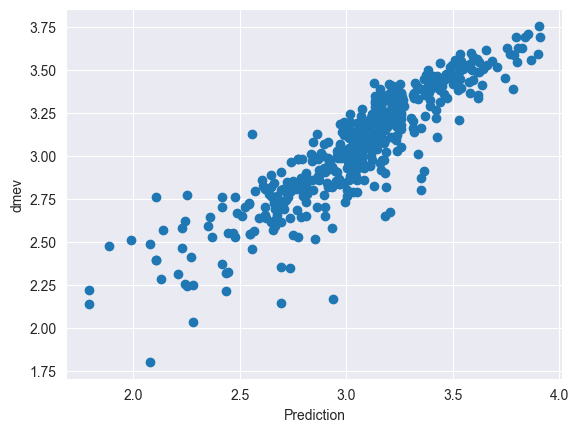

In [592]:
X_3_3 = X_3.drop(columns=['age', 'indus'])
pred_result_3_3 = results_3_3.get_prediction(X_3_3)
target_pred_3_3 = pred_result_3_3.predicted_mean

plt.scatter(y_3, target_pred_3_3)
plt.xlabel('Prediction')
plt.ylabel('dmev')
plt.show()

plt.xlabel('Prediction')
plt.ylabel('Residual')

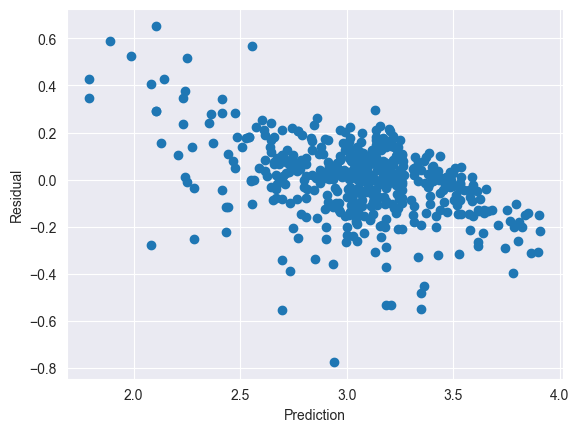

In [593]:
resid_full_3_3 = target_pred_3_3.ravel() - y_3.values.ravel()

plt.scatter(y_3, resid_full_3_3)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

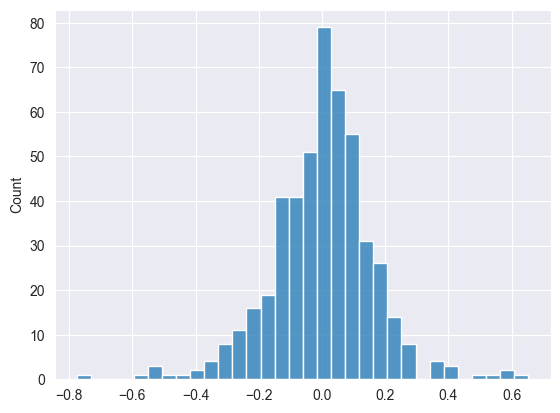

In [595]:
sns.histplot(resid_full_3_3);

The error distribution looks normal and the mean value is close to 0, so we think the model is doing a good job of predicting.

In [596]:
### Cook's distance
influence = results_3_3.get_influence()
cooks = influence.cooks_distance
(cooks[1] < 0.05).sum()

0

### Variance Inflation Factor (VIF)

In [597]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [598]:
vif_data = pd.DataFrame()
vif_data['feature'] =X_3_3.columns
vif_data['VIF'] = [variance_inflation_factor(X_3_3.values, i)
                   for i in range(len(X_3_3.columns))]

vif_data

,feature,VIF
0,const,1.000000
1,crim,1.790541
2,zn,2.247033
3,chas,1.056556
4,nox,3.737502
5,rm,1.781957
6,dis,3.485687
7,rad,6.838512
8,tax,7.279803
9,ptratio,1.661024


In [599]:
model_3_4 = sm.OLS(y_3, X_3_3.drop(columns=['tax']))
results_3_4 = model_3_4.fit()

print('with all features, R_2=%f, R_2 adj=%f' % (results_3.rsquared, results_3.rsquared_adj))
print('Prob (F-statistic): %f'% results_3.f_pvalue)
print('drop age and indus, R_2=%f, R_2 adj=%f' % (results_3_3.rsquared, results_3_3.rsquared_adj))
print('Prob (F-statistic): %f'% results_3_3.f_pvalue)
print('drop age, indus, tax R_2=%f, R_2 adj=%f' % (results_3_4.rsquared, results_3_4.rsquared_adj))
print('Prob (F-statistic): %f'% results_3_4.f_pvalue)


with all features, R_2=0.796777, R_2 adj=0.791227
Prob (F-statistic): 0.000000
drop age and indus, R_2=0.796264, R_2 adj=0.791576
Prob (F-statistic): 0.000000
drop age, indus, tax R_2=0.785210, R_2 adj=0.780725
Prob (F-statistic): 0.000000


In [600]:
X_3_4 = X_3_3.drop(columns=['tax'])

vif_data = pd.DataFrame()
vif_data['feature'] =X_3_4.columns
vif_data['VIF'] = [variance_inflation_factor(X_3_4.values, i)
                   for i in range(len(X_3_4.columns))]

vif_data

,feature,VIF
0,const,1.000000
1,crim,1.787906
2,zn,2.146518
3,chas,1.041553
4,nox,3.530176
5,rm,1.757618
6,dis,3.452191
7,rad,2.778629
8,ptratio,1.619498
9,black,1.339156


All VIFs are less 5, these features aren't explanable by each others.

In [601]:
print(results_3_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          5.68e-153
Time:                        05:24:15   Log-Likelihood:                 181.09
No. Observations:                 490   AIC:                            -340.2
Df Residuals:                     479   BIC:                            -294.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0578      0.008    400.233      0.0

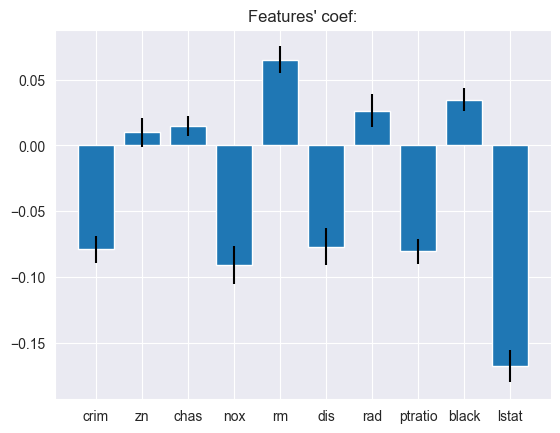

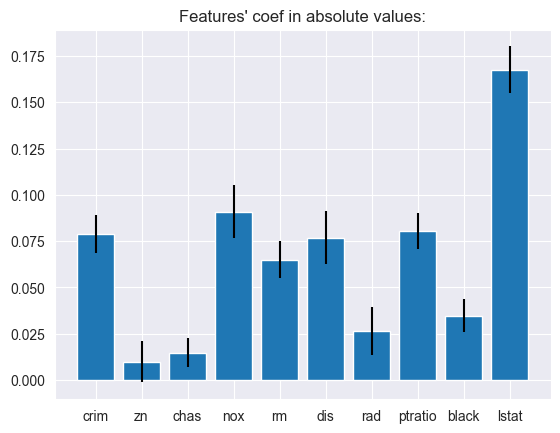

In [602]:
# Barplots of coef for model before transformation of medv
plt.bar(results_3_4.params.index[1:], results_3_4.params[1:], yerr=results_3_4.bse[1:])
plt.title("Features' coef:")
plt.show()
# In absolute values
plt.bar(results_3_4.params.index[1:], abs(results_3_4.params[1:]), yerr=results_3_4.bse[1:])
plt.title("Features' coef in absolute values:")
plt.show()

There is feature **zn** which have low coef. and high st.dev. Let's try remove it

In [603]:
removal_features.append('zn')
removal_features

['indus', 'age', 'zn']

In [604]:
model_3_5 = sm.OLS(y_3, X_3_4.drop(columns=['zn']))
results_3_5 = model_3_5.fit()

print('drop age, indus, tax R_2=%f, R_2 adj=%f' % (results_3_4.rsquared, results_3_4.rsquared_adj))
print('Prob (F-statistic): %f'% results_3_4.f_pvalue)

print('drop age, indus, tax, zn R_2=%f, R_2 adj=%f' % (results_3_5.rsquared, results_3_5.rsquared_adj))
print('Prob (F-statistic): %f'% results_3_5.f_pvalue)

drop age, indus, tax R_2=0.785210, R_2 adj=0.780725
Prob (F-statistic): 0.000000
drop age, indus, tax, zn R_2=0.784861, R_2 adj=0.780827
Prob (F-statistic): 0.000000


In [605]:
print(results_3_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     194.6
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          5.83e-154
Time:                        05:24:20   Log-Likelihood:                 180.69
No. Observations:                 490   AIC:                            -341.4
Df Residuals:                     480   BIC:                            -299.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0578      0.008    400.325      0.0

In [606]:
print('Comparison initial model and update model:')
print('Initial model (with all features = 13) \nR_2=%f, R_2 adj=%f' % (results_3.rsquared, results_3.rsquared_adj))
print('Prob (F-statistic): %f'% results_3.f_pvalue)
print('Update model (drop age, indus, tax, zn) \nR_2=%f, R_2 adj=%f' % (results_3_5.rsquared, results_3_5.rsquared_adj))
print('Prob (F-statistic): %f'% results_3_5.f_pvalue)

Comparison initial model and update model:
Initial model (with all features = 13) 
R_2=0.796777, R_2 adj=0.791227
Prob (F-statistic): 0.000000
Update model (drop age, indus, tax, zn) 
R_2=0.784861, R_2 adj=0.780827
Prob (F-statistic): 0.000000


**Conclusion:** There isn't multicollinearity. Minimum number of model defining features (9 features). The model describes the data as well as possible according to R-squared - 0.785. Adj. R-squared = 0.781  and it's significant Prob. (F-statistic - 5.83e -154).

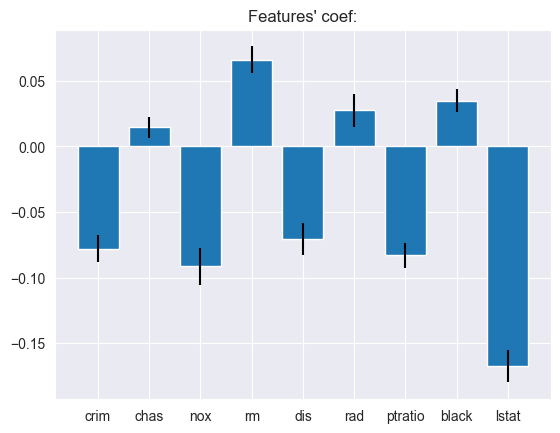

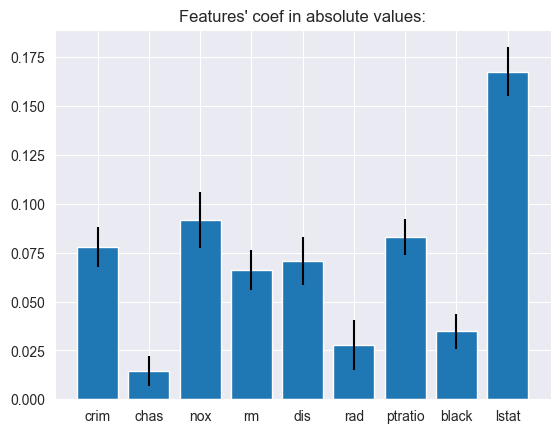

In [607]:
# Barplots of coef for update model
plt.bar(results_3_5.params.index[1:], results_3_5.params[1:], yerr=results_3_5.bse[1:])
plt.title("Features' coef:")
plt.show()
# In absolute values
plt.bar(results_3_5.params.index[1:], abs(results_3_5.params[1:]), yerr=results_3_5.bse[1:])
plt.title("Features' coef in absolute values:")
plt.show()

### Comparison initial and update models using statistic

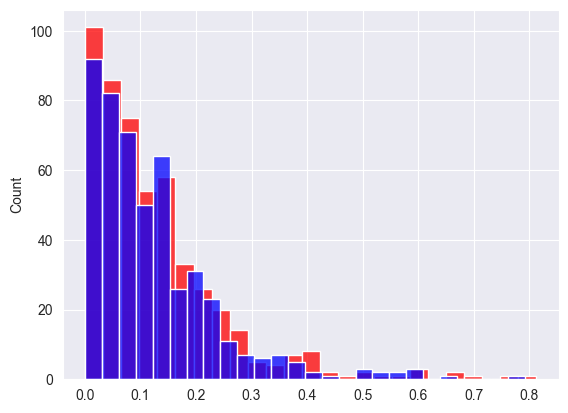

In [608]:
# initial model
pred_full = results_2.get_prediction(X)
pred_result_full = pred_full.predicted_mean

# update model
X_3_5 = X_3_4.drop(columns=['zn'])
pred_update = results_3_5.get_prediction(X_3_5)
pred_result_update = pred_update.predicted_mean

# errors for both models
errors_full = y_2.values.ravel() - pred_result_full.ravel()
errors_update = y_3.values.ravel() - pred_result_update.ravel()

sns.histplot(abs(errors_full), color='red');
sns.histplot(abs(errors_update), color='blue');

In [609]:
st.mannwhitneyu(abs(errors_full), abs(errors_update))

MannwhitneyuResult(statistic=126347.0, pvalue=0.6005501335242218)

In [610]:
abs(errors_full).mean(), abs(errors_update).mean()

(0.1270184384711154, 0.12167006373012228)

According to the average errors, then the updated model has fewer errors, although this difference is not significant. However, we got a model that is good for predicting home values up to 50,000 dollars. And it is suitable for interpreting fiches.

### Ideal district according to the analysis

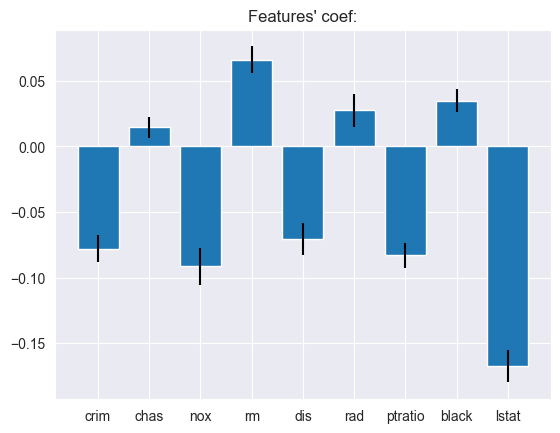

In [611]:
# Barplots of coef for update model
plt.bar(results_3_5.params.index[1:], results_3_5.params[1:], yerr=results_3_5.bse[1:])
plt.title("Features' coef:")
plt.show()

Above are the coefficients that affect the cost of housing.
Let us distinguish three groups:
Significant, Medium, Less Significant. Please note that all parameters are significant.
* Significant (lstat, nox, ptratio);
* Medium (crim, dis, rm);
* Less (black, rad, chas).

In an ideal neighborhood, it is necessary that:
S1. there was a low percentage of the population with low status (**lstat**);
S2. there was a low concentration of nitrogen oxides in the neighborhood (**nox**);
S3. there should be a low ratio of students to teachers by town. That is, to have fewer students per teacher (**ptratio**);

M4. There was a low per capita crime rate by town (**crim**);
M5. Was low weighted average of distances to five Boston employment centers (**dis**);

L7. Was high the proportion of blacks by town (**black**);
L8. Was high  index of accessibility to radial highways (**rad**);
L9. The land bordered the river (**chas**);

A separate tip for building houses. The number of rooms increases the cost of housing (**rm**).